
# Pandas

[Video](https://www.youtube.com/watch?v=zZkNOdBWgFQ&t=188s)

[Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Con Pandas podemos cargar, manipular, limpiar y analizar los datos, todo ello es gracias a una estructura de datos muy útil llamada **DataSet**. 
Veamos todas las cosas que podemos hacer con Pandas analizando el famosísimo dataset de los pasajeros del titanic.

In [1]:
# importamos las librerías que neceistaremos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importar los datos

Para empezar necesitamos usar el método `pd.read_extension()` teniendo en cuenta que la extensión del archivo puede ser csv, xls, JSON, HTML ó SQL entre los más populares. 
Como parámetro de `.read_extension()` le tenemos que pasar la ruta del archivo en tipo `str`. Si el archivo está en la misma carpeta que el notebook bastará con mencionarlo por su nombre.

[leer más de read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [2]:
data = pd.read_excel('titanic3.xls')
pd.read_excel('titanic3.xls')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### Análisis

Con los datos cargados ahora toca analizar el dataset, bucear en sus características y ver el estado en el que se encuentra.

In [3]:
# número de filas y columnas
data.shape

(1309, 14)

Usando el método `.head()` nos podemos hacer una idea de la tabla viendo las primeras líneas que contiene

In [4]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Vemos que la tabla se ha cargado correctamente. Ahora vamos a tomar muy pocos datos para este primer análisis, puesto que nos interesa estudiar el perfil de las personas según su edad, sexo, clase y si han sobrevivido.

Para ello vamos a hacer uso de `.columns`, que nos devolverá el nombre de cada columna y a continuación vamos a usar `.drop()` para quitar las columnas que no queremos utilizar. Esto no borrará los datos, solo actualizará nuestra variable `data` donde hemos copiado la información del dataset.

[leer más sobre .drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?)

In [5]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
data = data.drop(['name',
                  'sibsp', 
                  'parch', 
                  'ticket',
                  'fare', 
                  'cabin', 
                  'embarked', 
                  'boat', 
                  'body', 
                  'home.dest'], axis=1)

Recordemos que el método `.dorp()` se ha de especificar el parámetro `axis=1` ya que no podemos olvidar de que es el eje vertial, el de las columnas, sobre el que hacemos la lectura.

In [7]:
# representamos ahora los datos
data.head(8)

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
5,1,1,male,48.0000
6,1,1,female,63.0000
7,1,0,male,39.0000


En este punto podemos obtener ya una primera perspeciva de nuestros datos usando `.describe()` que nos devolverá una tabla con datos muy importantes.

In [8]:
# echemos un vistazo general a la tabla
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Fijémonos en la tabla que hemos obtenido gracias al método `.describe()`.

En la primera fila `count` aparecen la cuenta de los datos de cada campo. En las dos primeras columnas podemos ver que el valor es el mismo, 1309, mientras que en el segundo vemos que hay menos, 1049. Esto se debe a que hay celdas de la columna de edad que no se rellenaron y por lo tanto si vemos el dataframe encontremos que hay celdas con valor `NaN`, o lo que es lo mismo *Not a Number*.

Python no trabaja con valores `NaN`, por lo que nosotros tenemos que tomar la decisión de qué hacer con ellos.


Para escenarios en los que faltan datos podemos operar de dos maneras: 
1. Completar los huecos con un valor por defecto, por ejemplo, usando la media para rellenar los huecos. Para esto usaremos el método `.fillna()`
2. Eliminar las filas con registros incompletos, esto puede ser problemático porque puede falsear la muestra. En este caso usaremos `.dropna()`



In [9]:
# para el primer caso de rellenar los huecos con la media

data = data.fillna(data['age'].mean()) # en los huecos donde no haya valores, dentro de la columna 'age', introduce la media
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,12.883199
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,22.000000
50%,3.000000,0.000000,29.881135
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


In [93]:
# usando el segundo método de eliminación
data_no_nan = data.dropna(axis=0)
data.shape

(1309, 4)

Todos estos cambios afectan de un modo u otro a los valores estadísticos de la muestra, por lo que depende del caso usaremos el que convenga. 

Otra herramienta útil para nuestro estudio de los datos es hacer uso de `.value_counts()` que nos hace un recuento de cada valor presente. Vamos a usarlo para contar el número de pasajeros de cada clase. 

In [11]:
# Contar los pasajeros por cada clase
data['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

## Gráficos
Aprovechando estos datos del recuento de pasajeros por clases podemos hacer un gráfico de barras que nos ayudará a visualizar los datos mejor

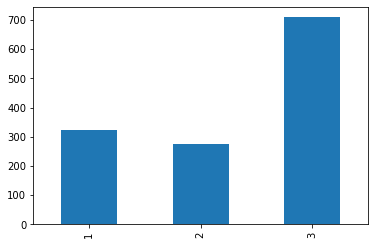

In [12]:
# gráfico de barras
data['pclass'].value_counts().plot.bar()
plt.show()

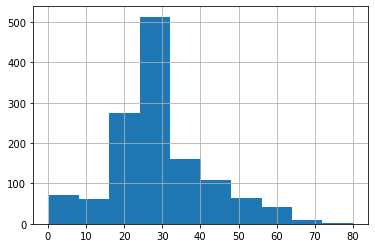

In [13]:
# histograma de edades
data['age'].hist()
plt.show()

Estos gráficos son posibles porque Pandas funciona muy bien sobre la base de Matplotlib y nos viene fenomenal para representar historgramas, gráficos de barras o nubes de puntos. 


Por último vamos a explicar otro método para analizar los datos, `.groupby()` que devuelve una tabla donde la primera columna es el parámetro que le pasamos para que cree los grupos.

In [14]:
# podemos estudiar estadísticamente agrupando los datos por los valores que toma un campo
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.154506,0.727468,28.886935
male,2.372479,0.190985,30.430716


In [15]:
# y por varios campos
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.965278  36.490920
       2       0.886792  27.566605
       3       0.490741  24.465552
male   1       0.340782  39.285410
       2       0.146199  30.744375
       3       0.152130  27.106930

## DataFrames y Series
Dentro de Pandas existen dos tipos estructuras de datos: las Series y los DataFrames. En otras palabras, los vectores y las tablas.

Una Serie no es más que un ndarray numpy 1D y además un eje de índices independientes del array. 

In [16]:
data['age']

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

Lo que nos econtramos es una columna a la derecha de índices, mientras que a la izquierda vemos los valores que contiene la columna edad. 
El índice nos lo da Pandas automáticamente, pero nosotros lo podemos cambiar por otro a nuestra voluntad. Por ejemplo podríamos usar el nombre de los pasajeros como índice mediante `.set_index()`

In [17]:
# me traigo de nuevo la tabla para el siguiente ejemplo
data = pd.read_excel('titanic3.xls')
data = data.drop(['sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [18]:
data = data.set_index('name')
data['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

Las tablas tienen un comportamiento parecido a los diccionarios. 
    
    Dicccionarios Dict['clave'] = valor
    Tablas        Df['campo'] = serie
    
De igual manera, podemos tomar un DataFrame y realizar acciones de indexing y slicing ya que se trata de un conjunto de arrays de numpy

In [19]:
# indexar los 30 primeros valores
data['age'][0:30]

name
Allen, Miss. Elisabeth Walton                        29.0000
Allison, Master. Hudson Trevor                        0.9167
Allison, Miss. Helen Loraine                          2.0000
Allison, Mr. Hudson Joshua Creighton                 30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)      25.0000
Anderson, Mr. Harry                                  48.0000
Andrews, Miss. Kornelia Theodosia                    63.0000
Andrews, Mr. Thomas Jr                               39.0000
Appleton, Mrs. Edward Dale (Charlotte Lamson)        53.0000
Artagaveytia, Mr. Ramon                              71.0000
Astor, Col. John Jacob                               47.0000
Astor, Mrs. John Jacob (Madeleine Talmadge Force)    18.0000
Aubart, Mme. Leontine Pauline                        24.0000
Barber, Miss. Ellen "Nellie"                         26.0000
Barkworth, Mr. Algernon Henry Wilson                 80.0000
Baumann, Mr. John D                                      NaN
Baxter, Mr. Quigg E

In [20]:
# realizar una máscara
data['age']>18

name
Allen, Miss. Elisabeth Walton                       True
Allison, Master. Hudson Trevor                     False
Allison, Miss. Helen Loraine                       False
Allison, Mr. Hudson Joshua Creighton                True
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     True
                                                   ...  
Zabour, Miss. Hileni                               False
Zabour, Miss. Thamine                              False
Zakarian, Mr. Mapriededer                           True
Zakarian, Mr. Ortin                                 True
Zimmerman, Mr. Leo                                  True
Name: age, Length: 1309, dtype: bool

In [21]:
# indexado lógico (boolean indexing)
data[data['age']>18]

,pclass,survived,sex,age
name,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0
"Anderson, Mr. Harry",1,1,male,48.0
"Andrews, Miss. Kornelia Theodosia",1,1,female,63.0
...,...,...,...,...
"Yasbeck, Mr. Antoni",3,0,male,27.0
"Youseff, Mr. Gerious",3,0,male,45.5
"Zakarian, Mr. Mapriededer",3,0,male,26.5


In [22]:
# agrupar por sexo y clase los pasajeros menores de 18 años
data[data['age']>18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.966667  39.358333
       2       0.878049  32.067073
       3       0.436170  29.457447
male   1       0.328671  42.716783
       2       0.087591  34.069343
       3       0.158845  29.799639

Para terminar, con el Slicing y el indexing es importante conocer las funciones `.iloc[]` y `.loc[]`. 
- `.iloc[]` significa index localization
- `.loc[]` trabaja solo sobre las columnas

In [23]:
# indexar un dato del dataframe
data.iloc[2,2]

'female'

In [24]:
# sacar un trozo del dataframe
data.iloc[0:5,:]

,pclass,survived,sex,age
name,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000
"Allison, Master. Hudson Trevor",1,1,male,0.9167
"Allison, Miss. Helen Loraine",1,0,female,2.0000
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000


In [25]:
data.iloc[0:5,0:5]

,pclass,survived,sex,age
name,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000
"Allison, Master. Hudson Trevor",1,1,male,0.9167
"Allison, Miss. Helen Loraine",1,0,female,2.0000
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000


In [26]:
# data.loc[0:2,'age']

In [27]:
data['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

In [92]:
for i in range(len(data['age'])):
    if data['age'][i]<=20:
        data['age'][i] = 1
    elif data['age'][i]>20 and data['age'][i]<=30:
        data['age'][i] = 2
    elif data['age'][i]>30 and data['age'][i]<=40:
        data['age'][i] = 3
    else:
        data['age'][i] = 4
        
data['age']

<ipython-input-92-04d8343b92a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][i] = 1


name
Allen, Miss. Elisabeth Walton                      1.0
Allison, Master. Hudson Trevor                     1.0
Allison, Miss. Helen Loraine                       1.0
Allison, Mr. Hudson Joshua Creighton               1.0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1.0
                                                  ... 
Zabour, Miss. Hileni                               1.0
Zabour, Miss. Thamine                              1.0
Zakarian, Mr. Mapriededer                          1.0
Zakarian, Mr. Ortin                                1.0
Zimmerman, Mr. Leo                                 1.0
Name: age, Length: 1309, dtype: float64

In [29]:
data['age'].value_counts()

1.0    821
4.0    488
Name: age, dtype: int64

# Análisis de series en el tiempo con Pandas

[Video](https://www.youtube.com/watch?v=qHRLG5hsW9I&t=15s)

El análisis de datos en el tiempo se da normalmente en estudios de la bolsa, del clima o cualquier otro fenómeno que evoluciona en el tiempo. Para realizar este análisis vamos a utilizar el histórico de la evolución del bitcoin.


In [30]:
# cargamos el histórico del Bitcoin
bitcoin = pd.read_csv('BTC-EUR.csv')

In [31]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165.0
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102.0
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825.0
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624.0


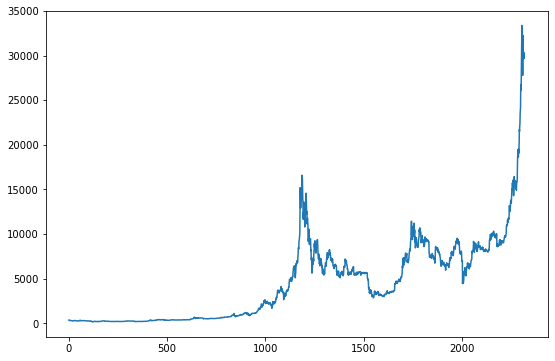

In [32]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

Si nos fijamos el gráfico, el eje horizontal no está expresando el intervalo en unidades de tiempo. Realmente está usando un índice numérico por defecto ya que no le hemos dicho a Pandas que utilice ninguno en concreto

In [33]:
bitcoin.index

RangeIndex(start=0, stop=2324, step=1)

para realizar esta tarea vamos a tener que desarrollar un nuevo tipo de índice, el DatetimeIndex. Para ello tenemos que volver a la sentencia en la que hicimos la lectura del documento .csv y especificar dos parámetros:
1. seleccionar un campo de fecha con `index_col`
2. que la fecha sea interpretada como tal `parse_dates=True`

In [1]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col="Date", parse_dates=True)

NameError: name 'pd' is not defined

In [2]:
bitcoin.head()

NameError: name 'bitcoin' is not defined

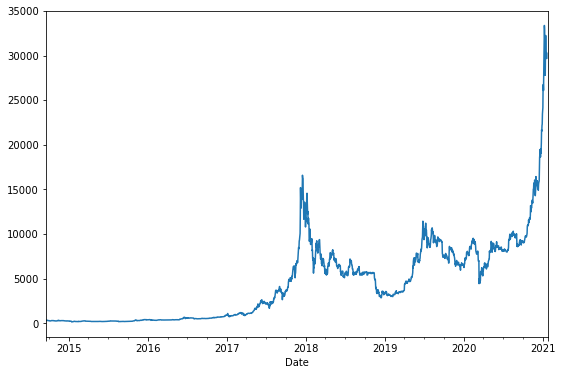

In [36]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [37]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26'],
              dtype='datetime64[ns]', name='Date', length=2324, freq=None)

Como vemos, ahora la columna fecha aparece en el primer lugar, nuestro gráfico muestra los datos en función del tiempo y cuando le preguntamos al dataset sobre el ínidice nos dice que es de tipo `DatetimeIndex`. Gracias a esto podemos hacer indexado sobre las fechas, ya que Pandas tiene capacidad para interpretar los términos como día, semana, mes, trimestre o año.

Por ejemplo, veamos cómo evolucionó el bitcoin en el año 2020.

<ipython-input-38-54f118660027>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2020']['Close'].plot()


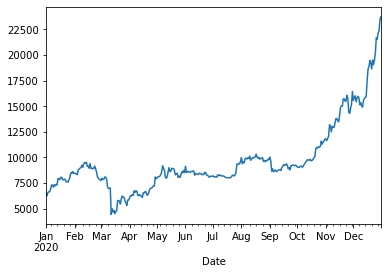

In [38]:
bitcoin['2020']['Close'].plot()
plt.show()

Si queremos afinar más el tiro, podemos especificar el mes, por ejemplo en marzo hubo una caida significativa seguramente por el efecto del covid.

<ipython-input-39-888974acd012>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2020-03']['Close'].plot()


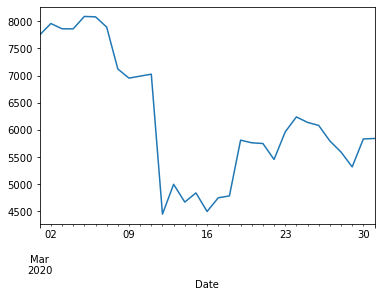

In [39]:
bitcoin['2020-03']['Close'].plot()
plt.show()

Podemos trabajar dentro de un intervalo que especifiquemos, por ejemplo, vamos a tomar de febrero a mayo del 2020.

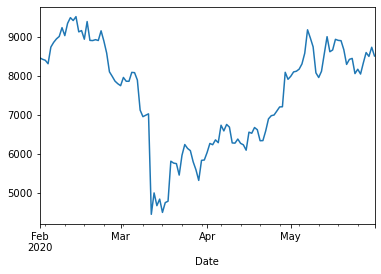

In [40]:
bitcoin['2020-02':'2020-05']['Close'].plot()
plt.show()

Podemos conseguir el mismo efecto que hemos visto usando el método `.loc[]` y cambiando un poquito el código

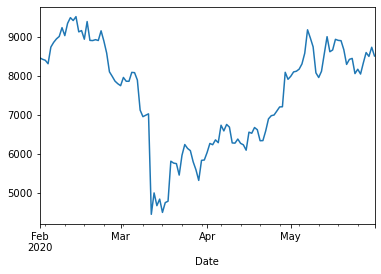

In [41]:
bitcoin.loc['2020-02':'2020-05', 'Close'].plot()
plt.show()

Pandas es muy flexible a la hora de recibir las fechas, podemos hacerlo de innumerables modos. Por ejemplo:
- '2020-02-03'
- '2020/02/03'
- '03 02 2020'
- '03 March 2020'

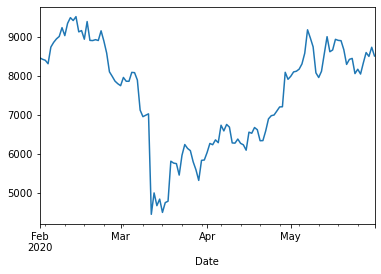

In [42]:
# le cambiamos el formato y el orden y lo ejecuta
bitcoin.loc['Feb 2020':'2020 May', 'Close'].plot()
plt.show()

## Remuestreo. resample()
Esta función nos permite reagrupar nuestros datos según la frecuencia temporal, teniendo en cuenta para ello un código temporal: 
- `Y` año
- `M` mes
- `W` semana
- `D` día
- `m` minuto, `s` segundo...

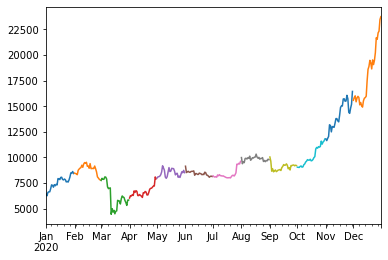

In [43]:
bitcoin.loc['2020', 'Close'].resample('M').plot()
plt.show()

En este caso nos hace una distinción entre cada mes y le asigna un color distinto. 
También podemos aplicar estadísticos descriptivos, por ejemplo una media

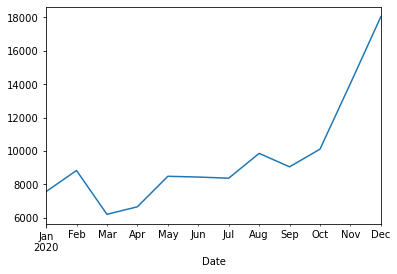

In [44]:
bitcoin.loc['2020', 'Close'].resample('M').mean().plot()
plt.show()

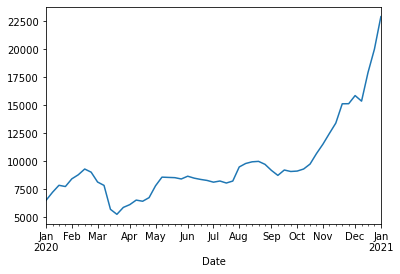

In [45]:
# para cada semana
bitcoin.loc['2020', 'Close'].resample('W').mean().plot()
plt.show()

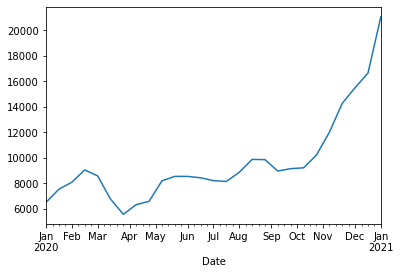

In [46]:
# para cada quincena
bitcoin.loc['2020', 'Close'].resample('2W').mean().plot()
plt.show()

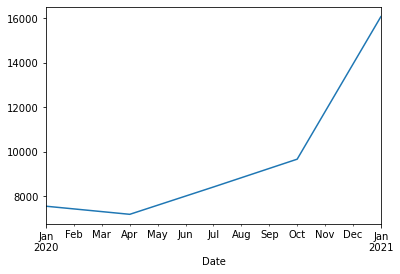

In [47]:
# por trimestres
bitcoin.loc['2020', 'Close'].resample('3M').mean().plot()
plt.show()

Podemos usar la desviación estandar `std()` para estudiar la volatilidad del bitcoin. Veremos que para el año 2020 no ha habido ninguna estabilidad

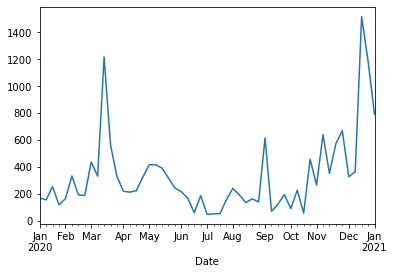

In [48]:
# para cada quincena
bitcoin.loc['2020', 'Close'].resample('W').std().plot()
plt.show()

El potencial que nos da resample es poder representar varios comportamientos a la vez en un mismo gráfico. 

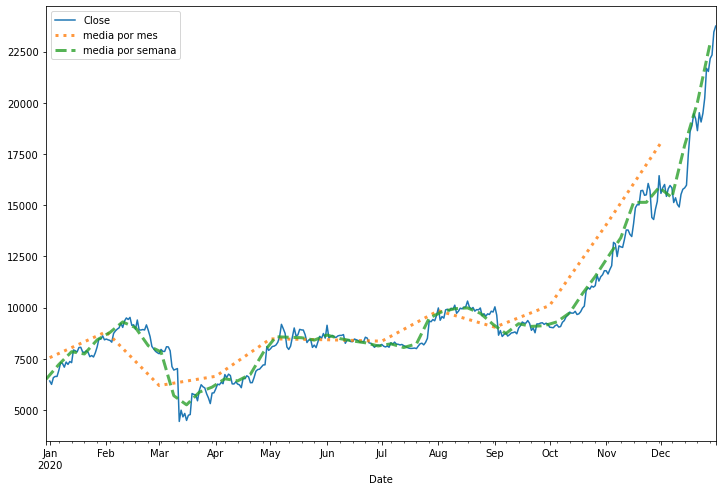

In [49]:
plt.figure(figsize=(12,8))
bitcoin.loc['2020', 'Close'].plot()
bitcoin.loc['2020', 'Close'].resample('M').mean().plot(label='media por mes', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2020', 'Close'].resample('W').mean().plot(label='media por semana', lw=3, ls='--',alpha=0.8)
plt.legend()
plt.show()

## Agregar .agg([...])

Con esta función podemos crear una tabla con los valores estadisticos que queramos fruto de nuestro remuestreo con resample.


In [55]:
bitcoin.loc['2020', 'Close'].resample('M').agg(['mean', 'std', 'min','max'])

,mean,std,min,max
Date,,,,
2020-01-31,7557.609659,624.455403,6252.938477,8621.291016
2020-02-29,8824.453243,482.546136,7798.025879,9521.362305
2020-03-31,6196.439768,1187.380743,4444.237305,8089.786133
2020-04-30,6648.152279,489.151092,6032.151855,8091.744629
2020-05-31,8475.515499,345.122833,7958.571289,9183.599609
2020-06-30,8431.344987,219.765432,8063.251465,9138.788086
2020-07-31,8361.939390,480.838267,7998.321289,9613.430664
2020-08-31,9849.319556,198.046560,9382.727539,10319.689453
2020-09-30,9044.105273,330.322884,8590.609375,10038.563477


Aprovechando esta cualidad podemos crear gráficos basados en estos datos para analizar la muestra en la que estamos centrados.

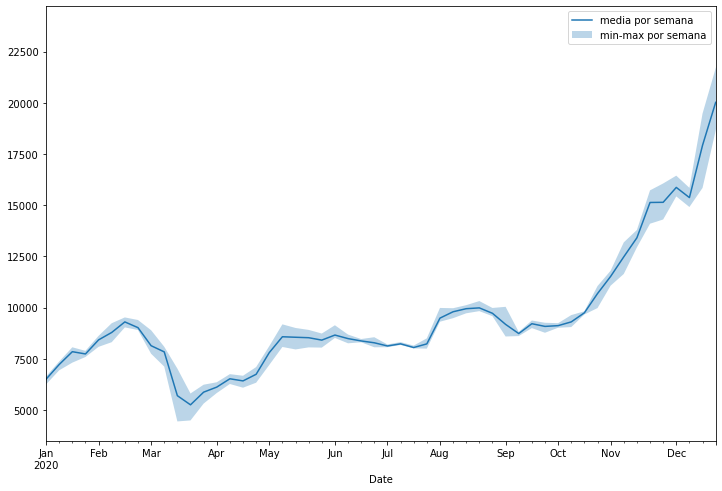

In [54]:
# guardamos el dataset en m
m = bitcoin.loc['2020', 'Close'].resample('W').agg(['mean', 'std', 'min','max'])

plt.figure(figsize=(12,8))
m['mean']['2020'].plot(label='media por semana')

# fill_between rellena el área entre dos curvas dadas
plt.fill_between(m.index, m['max'], m['min'], alpha=0.3, label='min-max por semana')

plt.legend()
plt.show()

## Moving Average. Media móvil

Esta es una técnica que permite calcular una media a lo largo del tiempo definiendo una ventana temporal que irá avanzando por la línea temporal de principio a fin. 
Por ejemplo, podemos definir una ventana de 5 días para que calcule la media móvil de Enero a Diciembre de 2020. Todo esto lo hacemos gracias a `.rolling(window)`

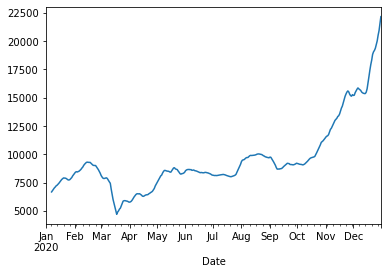

In [56]:
bitcoin.loc['2020', 'Close'].rolling(window=7).mean().plot()
plt.show()

Hagamos la comparación entre el comportamiento del mes de agosto de 2020 y la media móvil a 5 días del mismo periodo. 

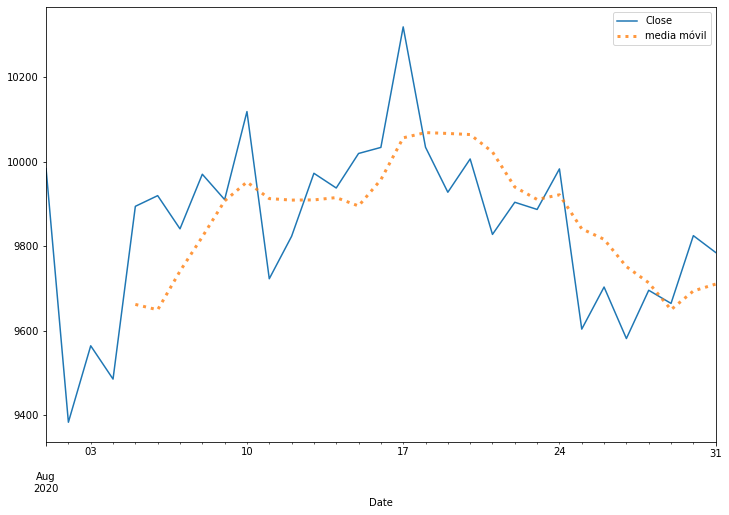

In [60]:
plt.figure(figsize=(12,8))
bitcoin.loc['2020-08', 'Close'].plot()
bitcoin.loc['2020-08', 'Close'].rolling(window=5).mean().plot(label='media móvil', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

Podemos ver que la gráfica de la media móvil no comienza hasta el final de la primera ventana de 5 días. Esto lo podemos arreglar llevando el valor hasta el centro de la ventana mediante el parámetro `center=True`

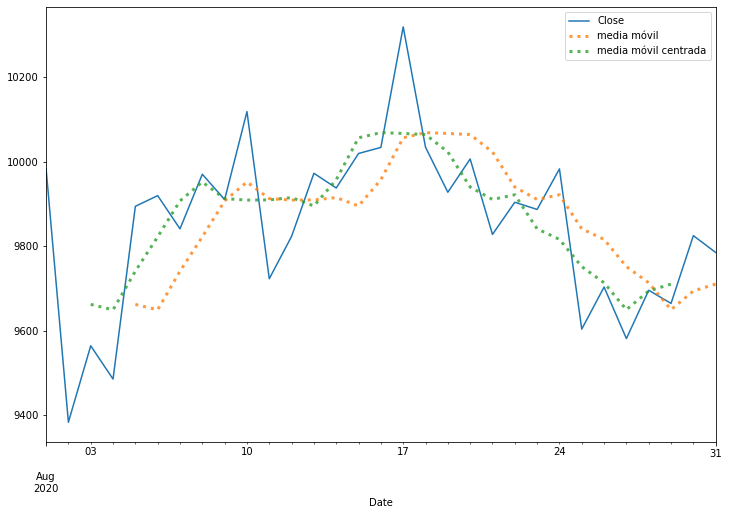

In [62]:
plt.figure(figsize=(12,8))

bitcoin.loc['2020-08', 'Close'].plot()
bitcoin.loc['2020-08', 'Close'].rolling(window=5).mean().plot(label='media móvil', lw=3, ls=':', alpha=0.8)
# center = True
bitcoin.loc['2020-08', 'Close'].rolling(window=5, center=True).mean().plot(label='media móvil centrada', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

### Exp Weighted Function. Media movil exponencial

La media movil exponencial está ya implementada dentro de pandas bajo el código `.ewm()` y es uno de los indicadores de análisis técnico básicos que resulta muy útil para determinar la tendencia del valor de un activo.

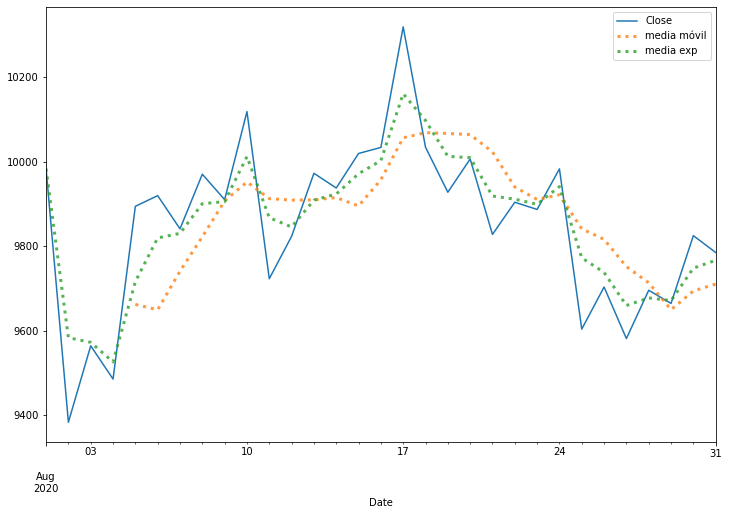

In [64]:
plt.figure(figsize=(12,8))

bitcoin.loc['2020-08', 'Close'].plot()
bitcoin.loc['2020-08', 'Close'].rolling(window=5).mean().plot(label='media móvil', lw=3, ls=':', alpha=0.8)
# center = True
bitcoin.loc['2020-08', 'Close'].ewm(alpha=0.5).mean().plot(label='media exp', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

Podemos escribir un pequeño bucle para comparar los distintos valores que puede tomar el parámetro alpha dentro del rango 0-1

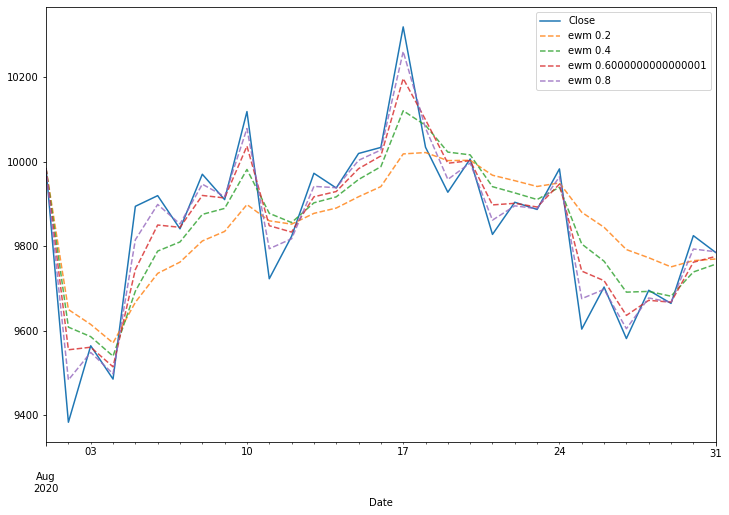

In [72]:
plt.figure(figsize=(12,8))

bitcoin.loc['2020-08', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2020-08', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)

plt.legend()
plt.show()

## Ensamblar datasets
Para realizar este ejemplo vamos a descargar el gráfico del Ethereum. El primer problema que tenemos que enfrentar es que el Ethereum es una moneda mucho más reciente que el Bitcoin. 

En Numpy no podemos concatenar dos conjuntos de datos que no tienen la misma dimensión, en cambio en Pandas podemos realizar esa tarea. Lo que sucederá es que los espacios vacíos aparecerán con el dato `NaN`. Veamos como afrontar el asunto.

In [74]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

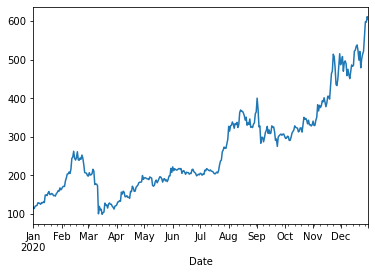

In [76]:
ethereum.loc['2020','Close'].plot()
plt.show()

Podemos ver que los datos se han cargado correctamente y ahora vamos a realizar la unión entre ambos datasets. Esto lo haremos usando la función: 

`pd.merge(left, right, how='inner', on=None)`

Tenemos que tener en cuenta que el parámetro `how` controla el tipo de unión, siguiendo los mismos conceptos de teoría de conjuntos: 

`how : {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’`

[leer más sobre pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html)

In [77]:
pd.merge(bitcoin, ethereum, on='Date')

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2015-08-07,255.233948,255.762100,253.128769,254.840027,254.840027,3.872464e+07,2.592821,3.231847,2.299453,2.526771,2.526771,149784.0
2015-08-08,254.983139,255.152679,237.635574,237.897186,237.897186,5.335247e+07,2.546495,2.551098,0.651468,0.686651,0.686651,614518.0
2015-08-09,238.005646,243.371613,237.414993,241.952362,241.952362,2.171376e+07,0.643639,0.801941,0.573504,0.640651,0.640651,485733.0
2015-08-10,242.312881,243.509033,239.726135,240.143463,240.143463,1.904967e+07,0.651688,0.662660,0.579996,0.643283,0.643283,368004.0
2015-08-11,240.027252,244.892654,240.676193,244.892654,244.892654,2.303587e+07,0.642956,1.024735,0.604369,0.967177,0.967177,1325151.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lo que obtenemos es una tabla con las mismas catacterísticas que las dos que se han unido y con sufijos "x" e "y" referidos al bitcoin y al ethereum respectivamente. Esto lo podemos cambiar haciendo uso del parámetro `suffixes`

In [78]:
pd.merge(bitcoin, ethereum, on='Date', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.233948,255.762100,253.128769,254.840027,254.840027,3.872464e+07,2.592821,3.231847,2.299453,2.526771,2.526771,149784.0
2015-08-08,254.983139,255.152679,237.635574,237.897186,237.897186,5.335247e+07,2.546495,2.551098,0.651468,0.686651,0.686651,614518.0
2015-08-09,238.005646,243.371613,237.414993,241.952362,241.952362,2.171376e+07,0.643639,0.801941,0.573504,0.640651,0.640651,485733.0
2015-08-10,242.312881,243.509033,239.726135,240.143463,240.143463,1.904967e+07,0.651688,0.662660,0.579996,0.643283,0.643283,368004.0
2015-08-11,240.027252,244.892654,240.676193,244.892654,244.892654,2.303587e+07,0.642956,1.024735,0.604369,0.967177,0.967177,1325151.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si nos fijamos, el dataset comienza a contar a partir de 2015-08-07. Esto se debe a que por defecto la función `pd.merge()` vene marcado como `how='inner'`. Esto quiere decir que todos los demás datos se han obviado. Si por el contrario seleccionamos `how='outer'` entrarán al dataset todos los valores anteriores del bictcoin

In [79]:
pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,1.638916e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,2.669185e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,2.956010e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,2.873682e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,2.070262e+07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nosotros vamos a quedarnos con todos los datos de cierre de sesión que compartan fecha en ambos datasets.

In [87]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', suffixes=('_btc', '_eth'))

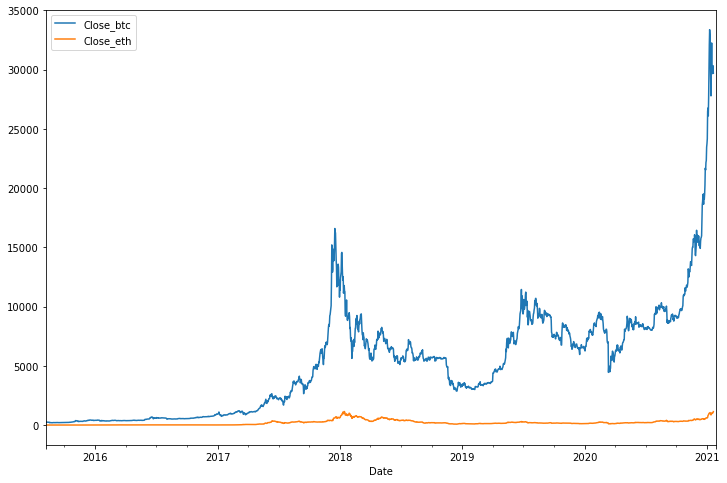

In [88]:
btc_eth[['Close_btc', 'Close_eth']].plot(figsize=(12,8))
plt.show()

Ahora el gráfico muestra el valor de ambas criptomonedas, pero el valor es tan grande y las fluctuaciones son tan exageradas en el bitcoin, que el ethéreum no parece tener un valor significativo ni muy variable en el tiempo. El problema viene de que comparten la misma escala de valores y esto se arregla separando las curvas en dos gráficos cambiando el parámetro `subplots=True`

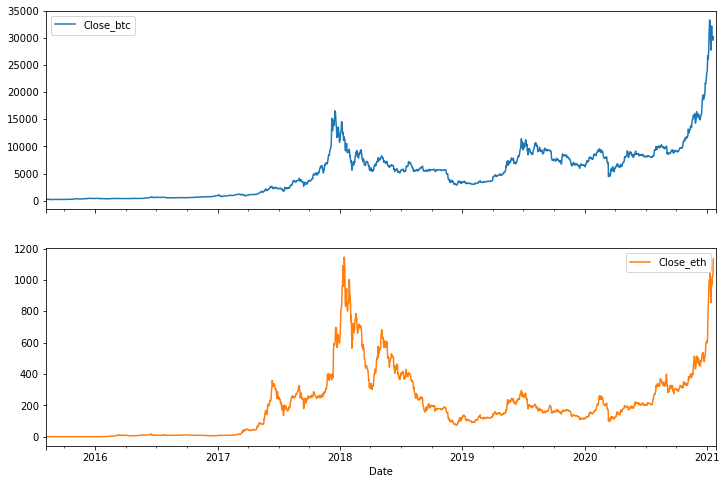

In [89]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True,figsize=(12,8))
plt.show()

Ahora que vemos cada moneda en su propia escala podemos adivinar que se aprecia cierta correlación entre ambas monedas y lo podemos comprobar usando `.corr()`

[leer más sobre .corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [90]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.769992
Close_eth,0.769992,1.000000


Nuestra hipótesis estaba en lo correcto y como se aprecia en la matriz encontramos una relación cercana al 80% entre ambas criptomonedas.

### Convertir categorías en números

Esta última tarea es una actividad frecuente a la hora de hacer ML, consiste en convertir texto en números, concretamente categorías en números. Esto lo hacemos para que nuestros algoritmos corran más rápido. Existen tres formas de hacer esto:
- `.map()`
- `.replace()`
- `.astype('category')`

### .map()
En este caso le proporcionamos a map un diccionario y el 